## EDA for Fuel Efficient Dataset 
Here I willl perform a Exploratory Data Analysis 

In [1]:
# Data Analytics 
import pandas as pd
import numpy as np


# Data Visualization 
import matplotlib.pyplot as plt
import missingno as mn 
import seaborn as sb


import datetime as dt
from datetime import datetime

In [113]:
cars = pd.read_csv('CarDataset.csv')

C:\Users\apple\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


To check data shape 

In [114]:
print(cars.shape) # (rows,columns) 
print(cars.size) # (rows * columns)

(43663, 83)
3624029


Data types of all columns 

In [88]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43663 entries, 0 to 43662
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               43663 non-null  int64         
 1   year             43663 non-null  int64         
 2   make             43663 non-null  object        
 3   model            43663 non-null  object        
 4   barrelsA08       43663 non-null  float64       
 5   charge120        43663 non-null  int64         
 6   charge240        43663 non-null  float64       
 7   city08           43663 non-null  int64         
 8   city08U          43663 non-null  float64       
 9   cityA08          43663 non-null  int64         
 10  cityA08U         43663 non-null  float64       
 11  cityCD           43663 non-null  float64       
 12  cityE            43663 non-null  float64       
 13  cityUF           43663 non-null  float64       
 14  co2              43663 non-null  int64

In [4]:
cars.columns # To see all of the columns 

Index(['sF', 'barrelsA08', 'charge120', 'charge240', 'city08', 'city08U',
       'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A',
       'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U', 'combA08',
       'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders', 'displ',
       'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08', 'fuelCostA08',
       'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA', 'highway08',
       'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE',
       'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make', 'model',
       'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn', 'sta

In [5]:
neworder = ['id', 'year', 'make', 'model','w', 'barrelsA08', 'charge120', 'charge240', 'city08', 'city08U',
       'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A',
       'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U', 'combA08',
       'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders', 'displ',
       'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08', 'fuelCostA08',
       'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA', 'highway08',
       'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE',
       'highwayUF', 'hlv', 'hpv', 'lv2', 'lv4',
       'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn', 'startStop', 'phevCity', 'phevHwy',
       'phevComb']

In [6]:
cars = cars.reindex(columns = neworder) 
# To reorder the columns where id, year, make, and model are more visible. 

In [7]:
cars['id'].dtypes 
cars.sort_values('id') 
# Want to use id as first (primary key) column, so it would appear more organized. 

,id,year,make,model,w,barrelsA08,charge120,charge240,city08,city08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,1,1985,Alfa Romeo,Spider Veloce 2000,NaN,0.0,0,0.0,19,0.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
11110,2,1985,Bertone,X1/9,NaN,0.0,0,0.0,20,0.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
21953,3,1985,Chevrolet,Corvette,NaN,0.0,0,0.0,15,0.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
32965,4,1985,Chevrolet,Corvette,NaN,0.0,0,0.0,15,0.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
38108,5,1985,Nissan,300ZX,NaN,0.0,0,0.0,15,0.0000,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37446,44065,2022,Subaru,Impreza Sport 5-Door,NaN,0.0,0,0.0,27,27.1962,...,FJX,NaN,0.0,NaN,Wed Jun 16 00:00:00 EDT 2021,Wed Jun 16 00:00:00 EDT 2021,N,0,0,0
37447,44066,2022,Cadillac,XT5 Hearse FWD,NaN,0.0,0,0.0,20,19.5853,...,GMX,NaN,0.0,NaN,Wed Jun 16 00:00:00 EDT 2021,Wed Jun 16 00:00:00 EDT 2021,Y,0,0,0
37448,44067,2022,Jeep,Grand Wagoneer 2WD,NaN,0.0,0,0.0,13,12.7459,...,CRX,NaN,0.0,NaN,Wed Jun 16 00:00:00 EDT 2021,Wed Jun 16 00:00:00 EDT 2021,N,0,0,0
37449,44068,2022,Jeep,Grand Wagoneer 4WD,NaN,0.0,0,0.0,13,12.6685,...,CRX,NaN,0.0,NaN,Wed Jun 16 00:00:00 EDT 2021,Wed Jun 16 00:00:00 EDT 2021,N,0,0,0


In [8]:
cars.set_index('id') # 'id' is set as the index. 

,year,make,model,w,barrelsA08,charge120,charge240,city08,city08U,cityA08,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
id,,,,,,,,,,,,,,,,,,,,,
1,1985,Alfa Romeo,Spider Veloce 2000,NaN,0.0,0,0.0,19,0.0,0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
10,1985,Ferrari,Testarossa,NaN,0.0,0,0.0,9,0.0,0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
100,1985,Dodge,Charger,NaN,0.0,0,0.0,23,0.0,0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1000,1985,Dodge,B150/B250 Wagon 2WD,NaN,0.0,0,0.0,10,0.0,0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
10000,1993,Subaru,Legacy AWD Turbo,NaN,0.0,0,0.0,17,0.0,0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1993,Subaru,Legacy,NaN,0.0,0,0.0,19,0.0,0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
9996,1993,Subaru,Legacy,NaN,0.0,0,0.0,20,0.0,0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
9997,1993,Subaru,Legacy AWD,NaN,0.0,0,0.0,18,0.0,0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


# Missing Values Percentages 

In [9]:
percent_missing = cars.isnull().sum() * 100 / len(cars) # This will find the percentages of all of the null values. 

missing_value_cars = pd.DataFrame({'percent_missing': percent_missing}) 
# This will properly show the columns and the percentage that is missing.


In [10]:
missing_value_cars.sort_values('percent_missing', inplace = True) 
# This will sort the values by 'percent missing'. Then confirm changes to dataframe. 
missing_value_cars

,percent_missing
id,0.000000
ghgScore,0.000000
ghgScoreA,0.000000
highway08,0.000000
highway08U,0.000000
...,...
evMotor,97.114262
sCharger,97.874631
c240Dscr,99.734329
c240bDscr,99.748070


In [11]:
print(missing_value_cars.head(50)) # To see missing values from the top 50
print(missing_value_cars.tail(50)) # To see missing values from the bottom 50

              percent_missing
id                        0.0
ghgScore                  0.0
ghgScoreA                 0.0
highway08                 0.0
highway08U                0.0
highwayA08                0.0
phevHwy                   0.0
highwayCD                 0.0
highwayE                  0.0
highwayUF                 0.0
hlv                       0.0
hpv                       0.0
lv2                       0.0
lv4                       0.0
phevBlended               0.0
pv2                       0.0
pv4                       0.0
range                     0.0
phevCity                  0.0
modifiedOn                0.0
createdOn                 0.0
charge240b                0.0
youSaveSpend              0.0
VClass                    0.0
fuelType1                 0.0
UHighwayA                 0.0
UCityA                    0.0
UCity                     0.0
rangeHwyA                 0.0
rangeHwy                  0.0
rangeCityA                0.0
rangeCity                 0.0
UHighway  

In [12]:
missing_value_cars[(missing_value_cars['percent_missing']> 0)] # To receive any columns that has missing data. 
# Notes for me:
# trany = transmission
# mpgData = My MPG data
# displ = engine displacement in liters.
# cylinders = engine cylinders 
# drive = drive axle type
# eng_dscr = engine descriptor
# trans_dscr = transmission descriptor
# mfrCode = 3 - character manufacturer code model
# startStop = Vehicles has start - stop technology
# tCharger = if T. this vehicle if turbocharged. 
# atvType = type of alternative fiel or advanced technology technology vehicle. 
# guzzler = if G or T, this vehicle is subject to the gas guzzler tax. 
# fuelType2 = For dual fuel vehicles, this will be the alternative fuel. 
# rangeA = EPA range for fuelType 2
# evMotor = electric motor (kw-hrs)
# sCharger = If S, this ehicle is supercharged. 
# c240Dscr = electric vehicle charger description. 
# c240bDscr = electric vehicle alternate charger description. 
# w = no idea (just take away)

,percent_missing
trany,0.025193
mpgData,0.146577
displ,0.659597
cylinders,0.664178
drive,2.716259
eng_dscr,37.933720
trans_dscr,65.545198
mfrCode,70.558597
startStop,72.576323
tCharger,81.080091


In [13]:
# I will leave trany, mpgData, displ, cylinders, and drive alone since they have such little
# percentage missing and is important. 

In [14]:
cars['atvType'].unique()
# One can determine from other columns what is the vehicles are so this will be deleted. # 90% is missing, so I won't consider 
# this one. (Missing at random)

array([nan, 'Diesel', 'Hybrid', 'Bifuel (CNG)', 'CNG', 'FFV', 'EV',
       'Bifuel (LPG)', 'Plug-in Hybrid'], dtype=object)

In [15]:
cars['trans_dscr'].unique()
# I consider this important since the transmission can affect the fuel efficiency. I will leave this alone. 
# (Missing at random)

array([nan, 'SIL', '2MODE CLKUP', 'CLKUP', '2MODE', '3MODE CLKUP',
       '2MODE 2LKUP', '3MODE', '4MODE', 'Creeper', 'SIL Creeper',
       'EMS 2MODE', '2LKUP', '2MODE CLKUP FW', 'DC/FW', 'EMS',
       '2MODE VLKUP', 'EMS 2MODE CLKU', '3MODE 2LKUP', 'EMS 3MODE',
       'VMODE CLKUP', 'VLKUP', 'EMS 2MODE CLKUP', 'EMS CLKUP',
       'EMS CMODE CLKUP', 'SIL CLKUP', 'CMODE CLKUP', 'VMODE', 'CMODE',
       '3LKUP', 'EMS 3MODE CLKUP', 'SIL EMS', '6MODE', '4MODE CLKUP',
       'VMODE VLKUP', '6MODE CLKUP', 'SIL 3MODE', 'LONG RATIO',
       'CMODE VLKUP', 'SIL 3MODE CLKUP', '3MODE VLKUP', 'Overdrive',
       'Lockup', '3MODE CLKUP FW', 'SIL 2MODE CLKUP', 'EMS 5MODE',
       '2MODE DC/FW', 'fuel injection', '2MODE 3LKUP', 'Lockup A3',
       'SIL CMODE', 'Elec Overdrive', 'Mech Overdrive'], dtype=object)

In [16]:
cars['mfrCode'].unique()
# This is redundant since the code tells us the manufacturer. We just need to look at the 'make' column.
# MCAR

array([nan, 'ADX', 'BEX', 'NLX', 'TYX', 'PRX', 'ASX', 'CRX', 'DSX', 'BMX',
       'FMX', 'NSX', 'RII', 'VWX', 'HNX', 'HYX', 'SAX', 'VVX', 'TKX',
       'KMX', 'GMX', 'MBX', 'RRG', 'LRX', 'BGT', 'JCX', 'MAX', 'MTX',
       'FJX', 'SKX', 'AZD', 'MLN', 'TVP', 'CDA', 'LTX', 'FEX', 'FSK',
       'TSL', 'BYD', 'JLX', 'VGA', 'SKR', 'MBV', 'FTG', 'QTM', 'PGN',
       'KAL', 'KGG', 'RAX', 'SUB', 'SCA'], dtype=object)

In [17]:
cars['startStop'] = cars['startStop'].replace(np.nan,'N')
cars['startStop'].unique()

# If it is missing, there is a good chance they don't have that feature. 
# MNAR, since we know why most of the column is empty. 

array(['N', 'Y'], dtype=object)

In [18]:
cars['tCharger'].unique() # Was going to change this from 0's and 1's for 1 = True and 0 = False. However, when changing to a 
# boolean would make it say True or False. I want it to be cheap, so I rather use int. 
# (Missing at random)

array([nan, 'T'], dtype=object)

In [19]:
cars['tCharger'] = cars['tCharger'].replace(['T'],['1'])
cars['tCharger'] = cars['tCharger'].replace(np.nan, 0)
cars['tCharger'] = cars['tCharger'].astype(int)
cars['tCharger'].unique()

array([0, 1])

In [20]:
cars['sCharger'].unique()

array([nan, 'S'], dtype=object)

In [21]:
cars['sCharger'] = cars['sCharger'].replace(['S'],['1'])
cars['sCharger'] = cars['sCharger'].replace(np.nan, 0)
cars['sCharger'] = cars['sCharger'].astype(int)
cars['sCharger'].unique()

# Same as 'tCharger'

array([0, 1])

In [22]:
cars['fuelType2'].unique() # Keeping this because it is important for older dual gas vehicles, plug-in hybrids, and electric. 

array([nan, 'Natural Gas', 'E85', 'Propane', 'Electricity'], dtype=object)

In [23]:
cars['guzzler'].unique() # Would not consider this important since most of it is missing and one and determine from other 
# stats that it is a guzzler or not. 
# MAR, since they have other data to depend on. 

array([nan, 'T', 'G', 'S'], dtype=object)

In [24]:
cars['rangeA'].unique()
cars['rangeA'] = cars['rangeA'].replace(np.nan, 0)
cars['rangeA'].unique()
# To correspond with the fuelType2 columns, would to know the range of the vehicles. Went to make the nan value into 0 since I am keeping the 
# fuelType2 column
# MNAR, there is not many vehicles that used a second fuel source. 

array([0, '360', '290', '230/270/270', '240/290/290', '230/270',
       '240/280', '220/260', '220/270/260', '240/290/280', '300', '140',
       '310', '260', '120', '250/220/320', '230', '210', '270', '280',
       '110', '320', '290/340', '270/240/340', '310/390', '130',
       '280/380', '180', '170', '310/460', '310-540', '310/540',
       '310/330', '330', '310/480', '310/440', '340-400', '340-440',
       '310-410', '340', '370', '240', '340-350', '250', '280/370',
       '240-420', '250/370', '230/350', '290/410', '310/340', '310/320',
       '310/410', '350-370', '330-450', '310-420', '280-350', '310-340',
       '300-420', '310/370', '220', '260/320', '310/420', '330/450',
       '380', '410', '350', '337/451', '307/420', '347', '286/382', '308',
       '413', '329', '236', '214', '248', '262', '278', '279', '264',
       '303', '219', '344', '338', '277', '307', '295', '415', '383',
       '312', '304', '353', '328', '345', '265', '294', '366', '331',
       '354', '337', '28

In [25]:
cars['evMotor'].unique() # I would leave this alone, since this is important for electric vehicles.

# (Missing not at random), electric cars are the newest. 

array([nan, '62 KW AC Induction', '50 KW DC', '27 KW AC Induction',
       '67 KW AC Induction', '24 KW AC Synchronous', '288V Ni-MH',
       '330V Ni-MH', '36V Ni-MH', '245V Ni-MH', '158V Ni-MH',
       '202V Ni-MH', '300V Ni-MH', '101V Ni-MH', '275V Ni-MH',
       '126V Li-Ion', '312V Ni-MH', '67 KW AC  Induction', '67 KW AC',
       '102kW AC Induction', '49kW DC Brushless', '56kW AC Induction',
       '49 kW DC Brushless', '85 kW AC Induction', '150 kW', '80 kW DCPM',
       '111 kW', '30 kW DCPM', '270V Li-Ion', '144V Li-Ion',
       '346V Li-Ion', '115V Li-Ion', '49 kW DCPM', '52 kW AC Induction',
       '144V Ni-MH', '125 kW AC Induction', '100 kW DCPM',
       '107 kW AC Induction', '18 kW', '2 @ 150 kw (300 kw)',
       '260 kW AC Induction', '280V Li-Ion', '107 kW AC PMSM',
       '374V Li-Ion', '92 kW DCPM', '266V Li-Ion', '55 kW DCPM',
       '115 kW AC Induction', '68 kW', '220V Li-Ion',
       '225 kW AC Induction', '270 kW AC Induction', '75 kW AC PMSM',
       '82 kW AC

In [26]:
cars['c240Dscr'].unique() 
cars['c240bDscr'].unique()

# I would leave these both alone, since they are very important to electric vehicles. I'm not sure if I should put 
# 'no charger' to fill in the data, but that could be over imputating and costing too much. 

# (Update) I am deleting it, because there does not seem to hold much value. 
# This was MNAR cause relations to electric cars. 

array([nan, 'dual charger', '6.6 kW charger', '80 amp dual charger',
       '3.6 kW charger', 'with 48A high power charger connector option',
       'with 80A dual charger option',
       'with 72A high power charger connector option'], dtype=object)

In [27]:
# Overall, as far as I can see, there isn't data I need to impute with the average
# since there are different ways of fueling and every car is not the same. I used 
# 0's and 1's to false and true. Also 0 for rangeA so the column would not be useless. 
cars.dtypes

id              int64
year            int64
make           object
model          object
w             float64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [28]:
# Since I do not know what 'w' represents and all of it is missing, 
# I will be dropping it. 
cars.drop(columns = ['w','guzzler','mfrCode','atvType','c240Dscr','c240bDscr'], inplace = True)


In [29]:
cars.columns

Index(['id', 'year', 'make', 'model', 'barrelsA08', 'charge120', 'charge240',
       'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF',
       'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'lv2', 'lv4', 'mpgData',
       'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA',
       'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA', 'UHighway',
       'UHighwayA', 'VClass', 'youSaveSpend', 'trans_dscr', 'tCharger',
       'sCharger', 'fuelType2', 'rangeA', 'evMotor', 'charge240b', 'createdOn',
       'modifiedOn', 'startStop', 'phevCity', 'phevHwy', 'phevComb'],
      dtype='object')

In [30]:
print(cars.loc[:,'createdOn'])
print(cars.loc[:,'modifiedOn'])

0        Tue Jan 01 00:00:00 EST 2013
1        Tue Jan 01 00:00:00 EST 2013
2        Tue Jan 01 00:00:00 EST 2013
3        Tue Jan 01 00:00:00 EST 2013
4        Tue Jan 01 00:00:00 EST 2013
                     ...             
43658    Tue Jan 01 00:00:00 EST 2013
43659    Tue Jan 01 00:00:00 EST 2013
43660    Tue Jan 01 00:00:00 EST 2013
43661    Tue Jan 01 00:00:00 EST 2013
43662    Tue Jan 01 00:00:00 EST 2013
Name: createdOn, Length: 43663, dtype: object
0        Tue Jan 01 00:00:00 EST 2013
1        Tue Jan 01 00:00:00 EST 2013
2        Tue Jan 01 00:00:00 EST 2013
3        Tue Jan 01 00:00:00 EST 2013
4        Tue Jan 01 00:00:00 EST 2013
                     ...             
43658    Tue Jan 01 00:00:00 EST 2013
43659    Tue Jan 01 00:00:00 EST 2013
43660    Tue Jan 01 00:00:00 EST 2013
43661    Tue Jan 01 00:00:00 EST 2013
43662    Tue Jan 01 00:00:00 EST 2013
Name: modifiedOn, Length: 43663, dtype: object


In [31]:
cars["createdOn"] = pd.to_datetime(cars["createdOn"])
cars["modifiedOn"] = pd.to_datetime(cars['modifiedOn'])
# Convert createdOn and modifiedOn into datetime64

C:\Users\apple\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\apple\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [32]:
print(cars['createdOn'].dtypes)
print(cars['modifiedOn'].dtypes)
# Confirmation

datetime64[ns]
datetime64[ns]


In [33]:
# Now to start the stats with all columns. 
cars.describe(include = 'all')

C:\Users\apple\AppData\Local\Temp/ipykernel_11948/2510720894.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cars.describe(include = 'all')


,id,year,make,model,barrelsA08,charge120,charge240,city08,city08U,cityA08,...,fuelType2,rangeA,evMotor,charge240b,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
count,43663.000000,43663.000000,43663,43663,43663.000000,43663.0,43663.000000,43663.000000,43663.000000,43663.000000,...,1745,43663.0,1260,43663.000000,43663,43663,43663,43663.000000,43663.000000,43663.000000
unique,NaN,NaN,139,4404,NaN,NaN,NaN,NaN,NaN,NaN,...,4,236.0,218,NaN,366,228,2,NaN,NaN,NaN
top,NaN,NaN,Chevrolet,F150 Pickup 2WD,NaN,NaN,NaN,NaN,NaN,NaN,...,E85,0.0,288V Ni-MH,NaN,2013-01-01 00:00:00,2013-01-01 00:00:00,N,NaN,NaN,NaN
freq,NaN,NaN,4201,226,NaN,NaN,NaN,NaN,NaN,NaN,...,1481,41923.0,138,NaN,34194,29175,38946,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2013-01-01 00:00:00,2013-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-06-16 00:00:00,2021-06-16 00:00:00,NaN,NaN,NaN,NaN
mean,21971.256808,2002.643520,NaN,NaN,0.222444,0.0,0.069126,18.693951,7.021316,0.793280,...,NaN,NaN,NaN,0.014465,NaN,NaN,NaN,0.237684,0.239700,0.237524
std,12748.497525,11.706039,NaN,NaN,1.143433,0.0,0.756315,8.876232,12.792717,6.119312,...,NaN,NaN,NaN,0.305459,NaN,NaN,NaN,3.566930,3.445856,3.489574
min,1.000000,1984.000000,NaN,NaN,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,10916.500000,1992.000000,NaN,NaN,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000


#  Outliers 

In [34]:
# Time for Outliers. We are going to find the outliers mpgs for
# Gas : City, Highway, and combination. 
# Hybrid: City, Highway, and combination.
# Electric: City, Highway, and combination. 
def outliers(x):
    q1=cars[x].quantile(.25)
    q3=cars[x].quantile(.75)
    lfence=q1-1.5*(q3-q1)
    ufence=q3+1.5*(q3-q1)
    condition=(cars[x]<lfence)|(cars[x]>ufence)
    iqr_outliers=cars[x][condition]
    print(str(x), 'has', len(iqr_outliers.values),'outliers.')
# A function to determine the outliers for certain columns. 



In [35]:
x = 'city08' # city mpg for fuelType1
print(outliers(x))
x = 'highway08' # highway mpg for fuelType1
print(outliers(x))
x = 'comb08' # combined mpg for fuelType1 
print(outliers(x))
x = 'phevCity' # plug-in hybrid city mpgs for fueltype1
print(outliers(x))
x = 'phevHwy'# plug-in hybrid highway mpgs for fueltype1
print(outliers(x))
x = 'phevComb'# plug-in hybrid combined mpgs for fueltype1
print(outliers(x))
x = 'cityE' # city electric consumption
print(outliers(x))
x = 'highwayE'# highway electric consumption
print(outliers(x))
x = 'combE' # combined electric consumption
print(outliers(x))

city08 has 1237 outliers.
None
highway08 has 749 outliers.
None
comb08 has 1420 outliers.
None
phevCity has 236 outliers.
None
phevHwy has 236 outliers.
None
phevComb has 236 outliers.
None
cityE has 523 outliers.
None
highwayE has 523 outliers.
None
combE has 523 outliers.
None


In [36]:
print(cars['city08'].describe())
print(cars['highway08'].describe())
print(cars['comb08'].describe())
print(cars['phevCity'].describe())
print(cars['phevHwy'].describe())
print(cars['phevComb'].describe())
print(cars['cityE'].describe())
print(cars['highwayE'].describe())
print(cars['combE'].describe())

# Since this is for fuel efficiency, I believe these are the important columns. 
# I wanted the mean and std of all of these. 

count    43663.000000
mean        18.693951
std          8.876232
min          6.000000
25%         15.000000
50%         17.000000
75%         21.000000
max        150.000000
Name: city08, dtype: float64
count    43663.000000
mean        24.802579
std          8.365106
min          9.000000
25%         20.000000
50%         24.000000
75%         28.000000
max        133.000000
Name: highway08, dtype: float64
count    43663.000000
mean        20.931475
std          8.508197
min          7.000000
25%         17.000000
50%         20.000000
75%         23.000000
max        142.000000
Name: comb08, dtype: float64
count    43663.000000
mean         0.237684
std          3.566930
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         97.000000
Name: phevCity, dtype: float64
count    43663.000000
mean         0.239700
std          3.445856
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         81.000000

# Data Visualization

In [68]:
def bar(x,y):
    plt.bar(x,y)
    plt.title(str(y) + '/' + str(x))
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    # make this a function for the rest. 

# Gasoline (only) cars 

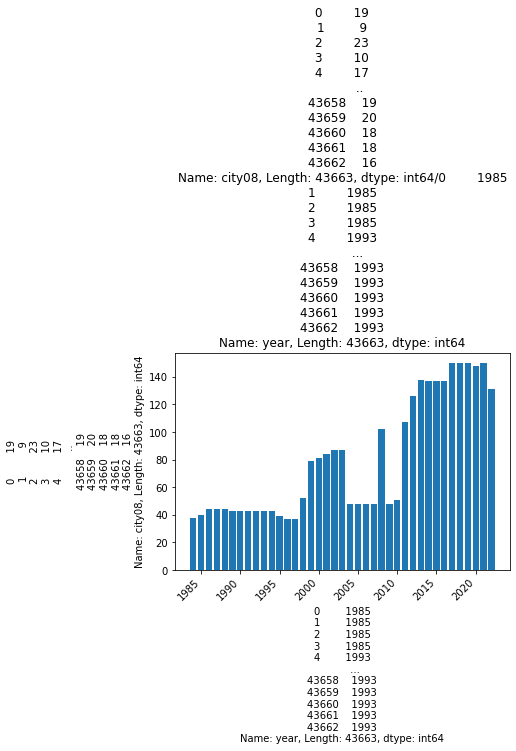

None


In [69]:
x = cars['year']
y = cars['city08']
print(bar(x,y))

# I wanted to make an average city mpg for each year, but I did not know how 
# to compute that. 

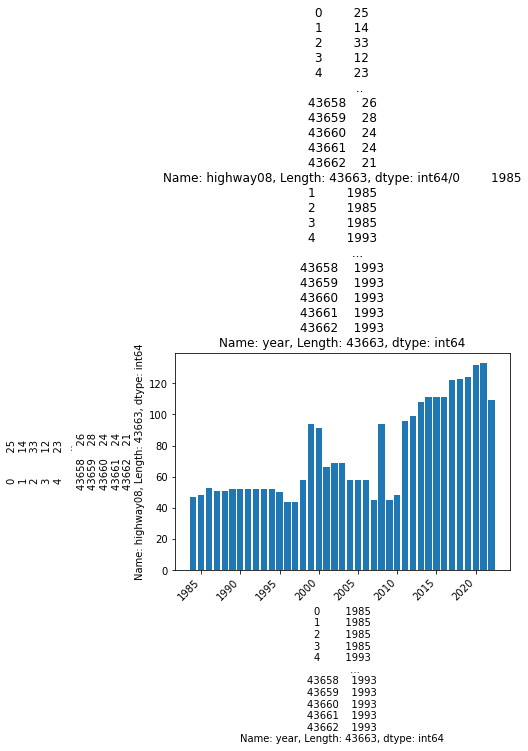

None


In [70]:
# Going to be doing the same thing for the rest of the columns mentioned. 
y = cars['highway08']
print(bar(x,y))

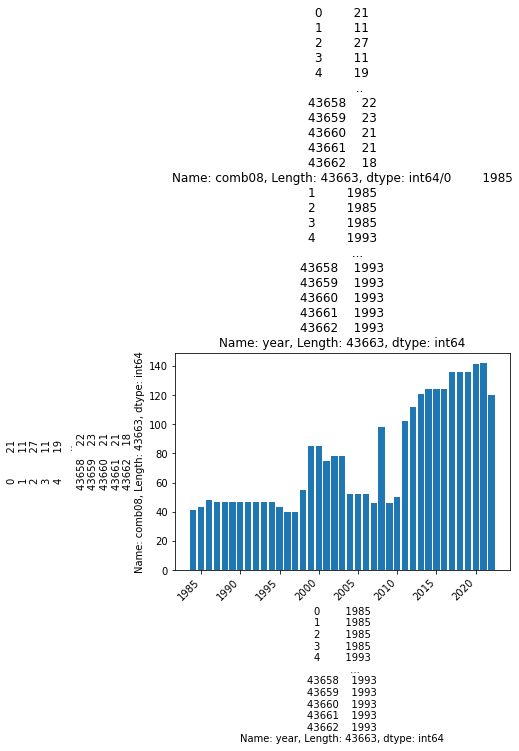

None


In [71]:
y = cars['comb08']
print(bar(x,y))

In [42]:
# As expected, it goes from lower mpgs to higher mpgs. That is caused by the 
# new regulations to make a vehicle more fuel efficient. Also the transistion of 
# manual and automatic tranmissions to CVTs, which is more efficient. 

In [72]:
def bar(x,y):
    plt.bar(x,y,color = 'purple')
    plt.title(str(y) + '/' + str(x))
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plug-in Hybrid Cars 

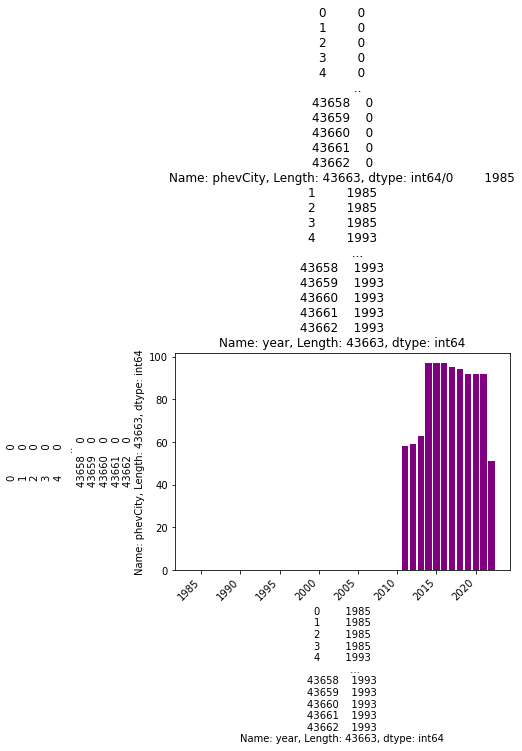

None


In [73]:
y =  cars['phevCity']
print(bar(x,y))

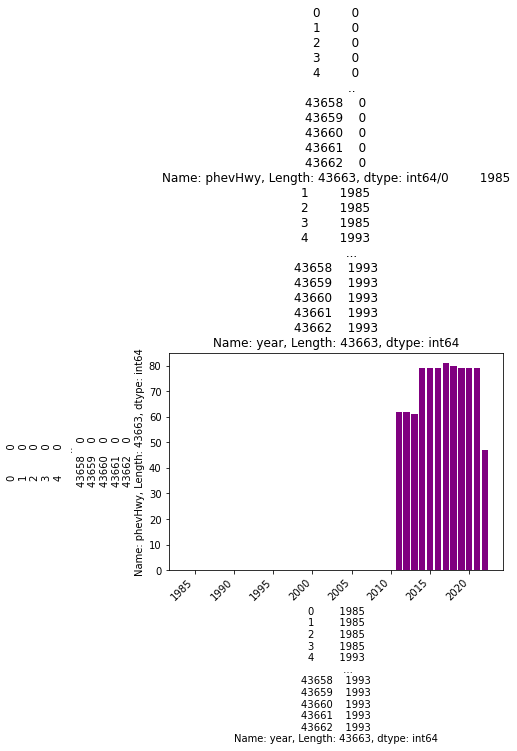

None


In [74]:
y = cars['phevHwy']
print(bar(x,y))

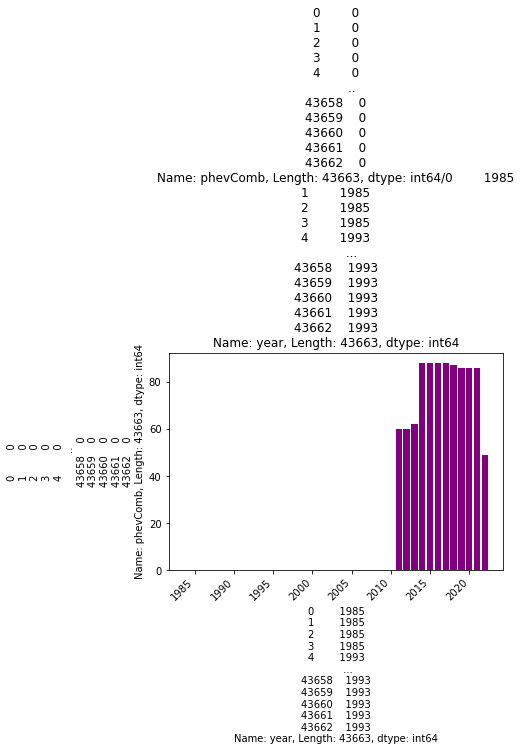

None


In [75]:
y = cars['phevComb']
print(bar(x,y))

In [76]:
# Hybrid vehicles are new and even more efficient. They use electric from the plug in 
# and when using gas they have regenerative braking which gives back the power. 

In [89]:
def bar(x,y):
    plt.bar(x,y,color = 'green') # To change the color. 
    plt.title(str(y) + '/' + str(x))
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Electric Cars

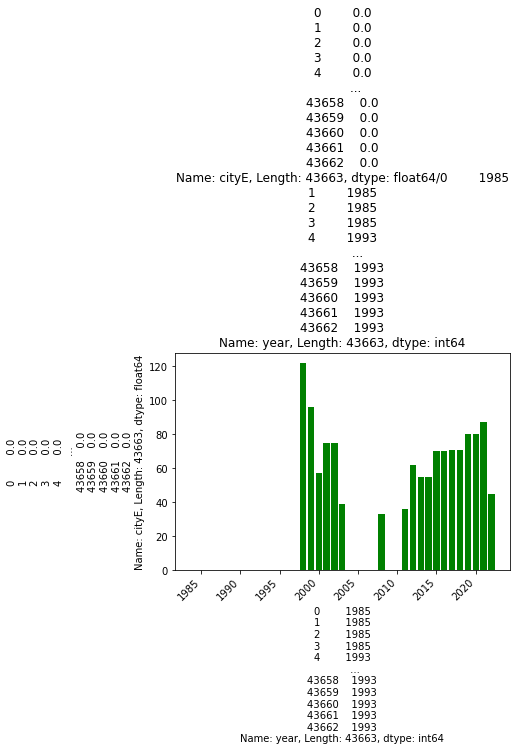

None


In [80]:
y = cars['cityE']
print(bar(x,y))

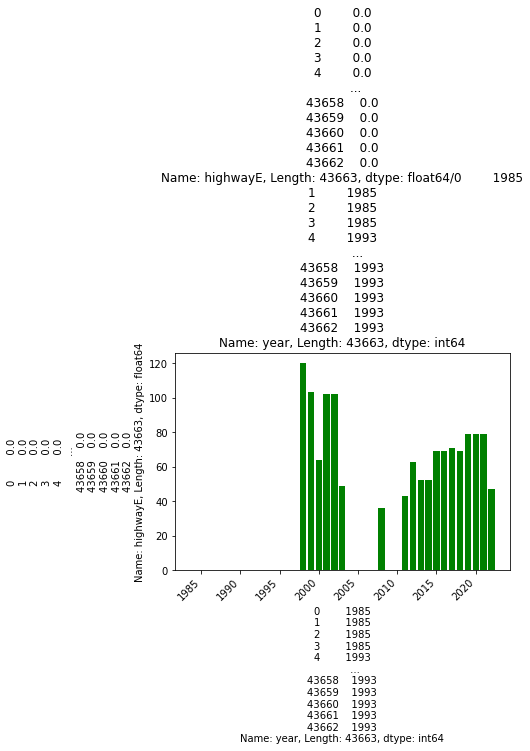

None


In [81]:
y = cars['highwayE']
print(bar(x,y))

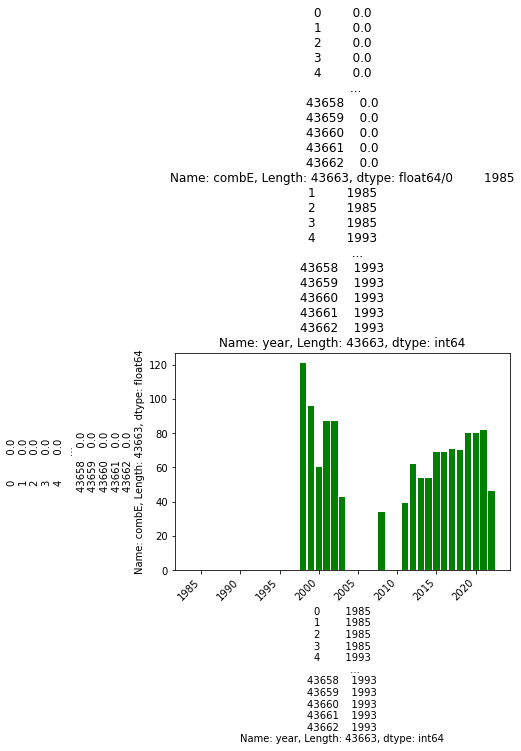

None


In [82]:
y = cars['combE']
print(bar(x,y))

In [52]:
# There were some early models for electric vehicles, but where more normalized in the 2010s.

In [83]:
# Is there is an association between fuel type and fuel efficiency? 
def bar(x,y):
    plt.bar(x,y,color = 'yellow')
    plt.title(str(y) + '/' + str(x))
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    plt.xticks(rotation=90, ha='right')
    plt.show()

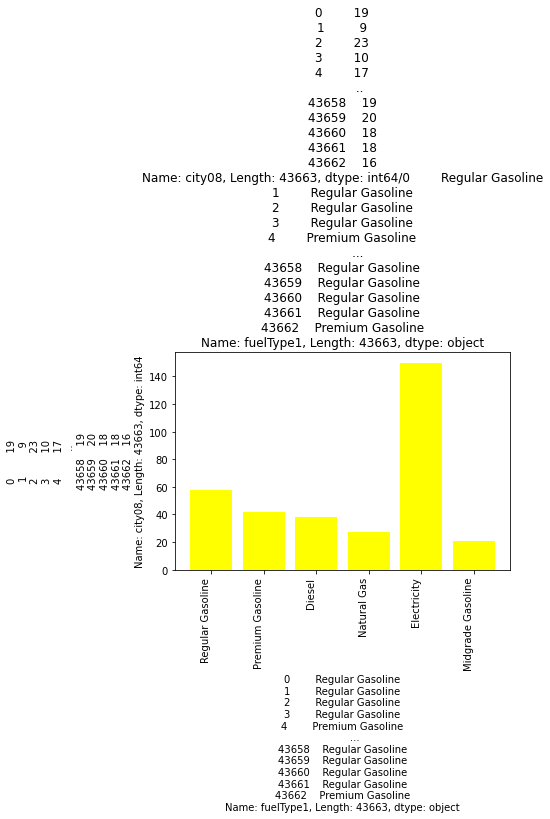

None


In [84]:
x = cars['fuelType1'] # I dont know how to resize the words on the chart. 
y = cars['city08']
print(bar(x,y))

# Electricity seems to be the most efficient. 

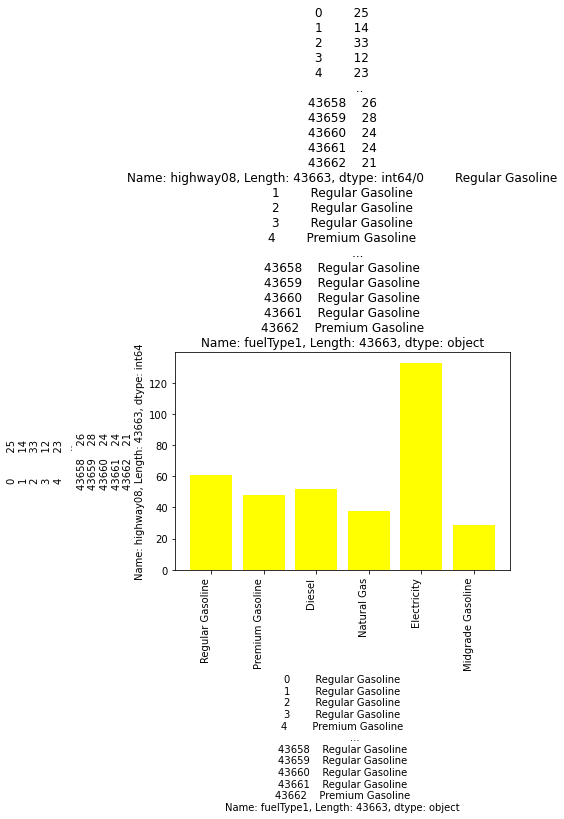

None


In [85]:
x = cars['fuelType1']
y = cars['highway08']
print(bar(x,y))

# Electricity seems to be the most efficient. 

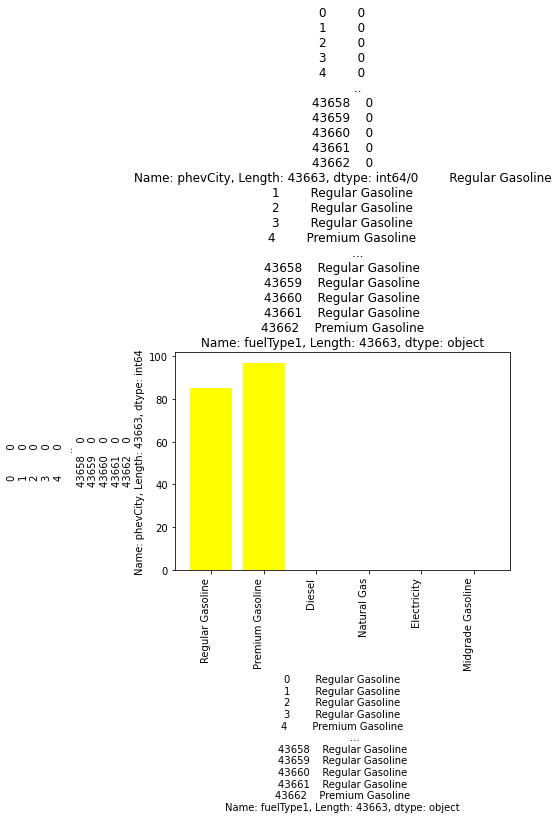

None


In [86]:
x = cars['fuelType1'] 
y = cars['phevCity']
print(bar(x,y))


# Premium gas seems to be the most efficient. 

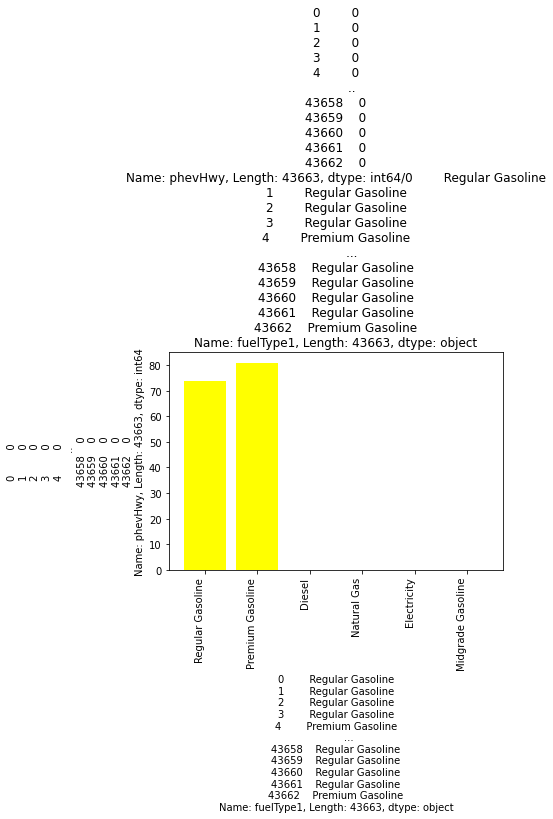

None


In [87]:
x = cars['fuelType1'] 
y = cars['phevHwy']
print(bar(x,y))

# Premium gas seems to be the most efficient. 

In [ ]:
x = cars['fuelType2'] 
y = cars['cityA08']
print(bar(x,y))
x = cars['fuelType2'] 
y = cars['highwayA08']
print(bar(x,y))
x = cars['fuelType2'] 
y = cars['cityE']
print(bar(x,y))
x = cars['fuelType2'] 
y = cars['highwayE']
print(bar(x,y))

# This would not work, so I included all of them. 

In [ ]:
# Which fuel seems to be the most efficient? 

# From the data above, it seems that plug - in hybrid would be the most efficient 
#since they use both gas and electricity. 

# Fuel types vs fuel efficiency? 

# From the information I could gather, fueltype1 is more efficient for gas powered 
# car and fuelType2 is more for plug - in hybrid and electric. Therefore, 
# fueltype2 is more efficient. 


# The most significant in cities and highways? 

# With regular gas vehicles, they are obviously going to be more effective on the 
# highway than in the city. However, plug - in hybrids and electric vehicles were 
# more designed for city driving and have better mpgs in the city than the highway. 